
First five rows:


/tmp/ipython-input-2-1412375756.py:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


,Name,Email,Which area are you staying in?,Have you sold anything before?,What would you like to sell on KollegeKit?,Would you like help finding products to resell?
0,Puneeth S,bubblypuneeth@gmail.com,Local,Planning to start now,"Books (Blue Book), Ready-to-Eat Food",Yes
1,Sarrin lal,sarrin2001@gmail.com,Local,Yes,"PG Rooms, Bicycles, Mobile Phones, PC Accessor...",Yes
2,P. Chetana,polankichetana@gmail.com,Hostel,No,Thrift Store Items,Yes
3,Rahil Parvez,rahilparvez176@gmail.com,PG near college,Yes,Mobile Phones,Yes
4,Lily,sgana7596@gmail.com,Local,Yes,"Trendy Items / Cool Gadgets, Ladies' Cosmetics...",Yes



Columns: ['Name', 'Email', 'Which area are you staying in?', 'Have you sold anything before?', 'What would you like to sell on KollegeKit?', 'Would you like help finding products to resell?']

Missing values:
 Name                                               0
Email                                              0
Which area are you staying in?                     0
Have you sold anything before?                     0
What would you like to sell on KollegeKit?         0
Would you like help finding products to resell?    0
dtype: int64


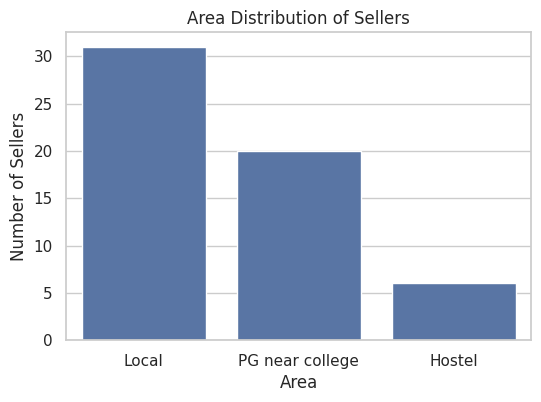

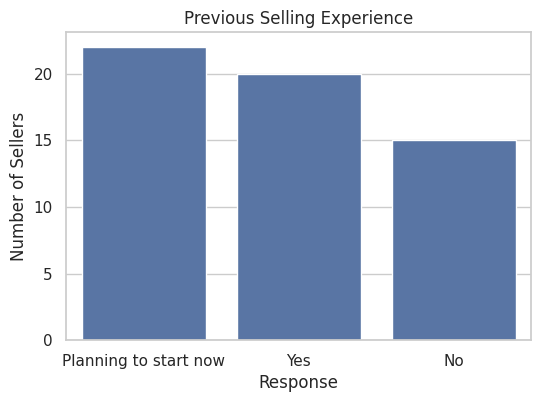

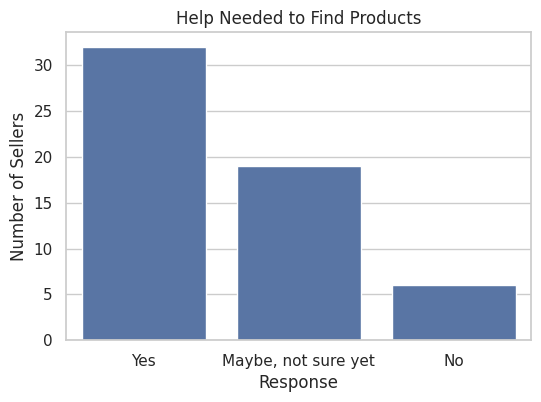

/tmp/ipython-input-2-1412375756.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=prod_ct.values, y=prod_ct.index, palette="mako")


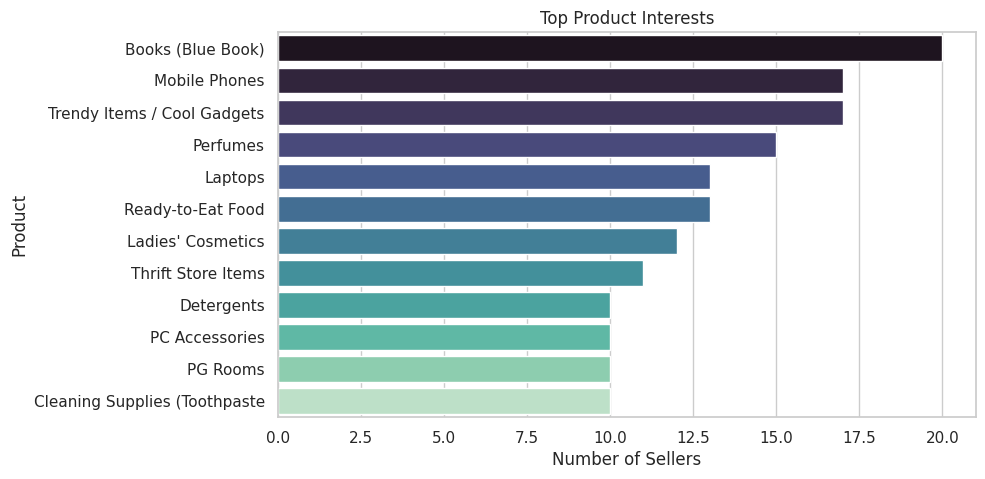

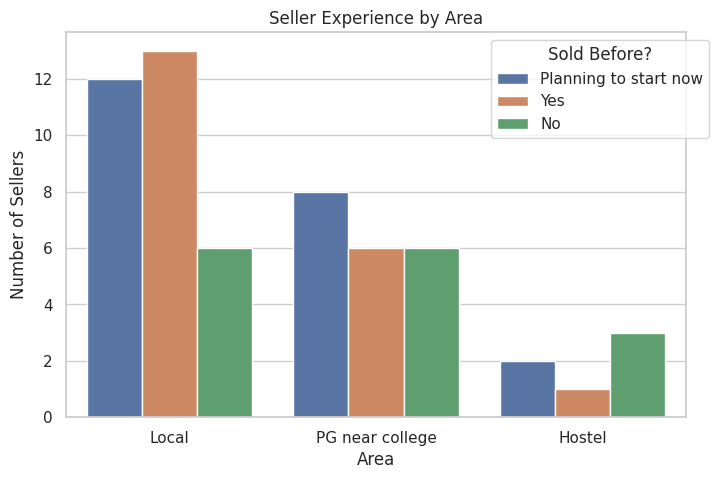

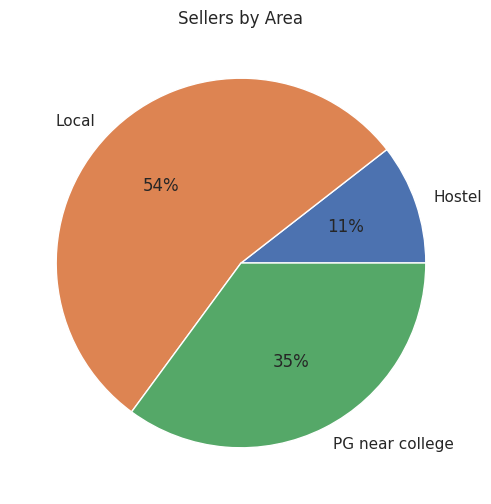


Summary Table: Number of sellers by Area & Experience



In [ ]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Plot settings
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (8,5)

# 1. Load CSV
from google.colab import files
uploaded = files.upload()

# Replace filename below if needed
df = pd.read_csv("Sellers lst.csv")

# 2. Clean data (strip whitespace)
df.columns = df.columns.str.strip()
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

print("\nFirst five rows:")
display(df.head())

print("\nColumns:", df.columns.tolist())

# 3. Basic stats
print("\nMissing values:\n", df.isnull().sum())

# 4. Distribution: Area
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Which area are you staying in?', order=df['Which area are you staying in?'].value_counts().index)
plt.title('Area Distribution of Sellers')
plt.xlabel('Area')
plt.ylabel('Number of Sellers')
plt.show()

# 5. Distribution: Selling Experience
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Have you sold anything before?',
              order=df['Have you sold anything before?'].value_counts().index)
plt.title('Previous Selling Experience')
plt.xlabel('Response')
plt.ylabel('Number of Sellers')
plt.show()

# 6. Distribution: Need Help Finding Products
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Would you like help finding products to resell?',
              order=df['Would you like help finding products to resell?'].value_counts().index)
plt.title('Help Needed to Find Products')
plt.xlabel('Response')
plt.ylabel('Number of Sellers')
plt.show()

# 7. Product Preferences (explode answers)
if 'What would you like to sell on KollegeKit?' in df.columns:
    df_exploded = df.assign(
        Products = df['What would you like to sell on KollegeKit?'].str.split(',')
    ).explode('Products')
    df_exploded['Products'] = df_exploded['Products'].str.strip()
    prod_ct = df_exploded['Products'].value_counts().head(12)
    plt.figure(figsize=(9,5))
    sns.barplot(x=prod_ct.values, y=prod_ct.index, palette="mako")
    plt.title('Top Product Interests')
    plt.xlabel('Number of Sellers')
    plt.ylabel('Product')
    plt.show()
else:
    print("Column 'What would you like to sell on KollegeKit?' not found!")

# 8. Area vs. Experience (stacked/grouped)
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Which area are you staying in?',
              hue='Have you sold anything before?',
              order=df['Which area are you staying in?'].value_counts().index)
plt.title('Seller Experience by Area')
plt.xlabel('Area')
plt.ylabel('Number of Sellers')
plt.legend(title='Sold Before?', bbox_to_anchor=(1.05, 1))
plt.show()

# 9. Pie chart - Sellers per Area
area_ct = df.groupby('Which area are you staying in?')['Name'].nunique()
plt.figure(figsize=(6,6))
area_ct.plot(kind='pie', autopct='%1.0f%%', ylabel='')
plt.title('Sellers by Area')
plt.show()

# 10. Summary Table (Area x Experience)
summary = df.groupby(['Which area are you staying in?', 'Have you sold anything before?'])['Name'].count().unstack(fill_value=0)
print("\nSummary Table: Number of sellers by Area & Experience\n")